In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Since data has some NA value, so we need drop NA

In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split

#define what x and y is
X = data.drop(['median_house_value'], axis=1) #x is the table without median_house_value
Y = data['median_house_value'] #y is the table only with median_house_value

In [8]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [9]:
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) #we are going to use 20% of data for evaluating

In [11]:
train_data = X_train.join(Y_train)

In [12]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8420,-118.34,33.93,37.0,1638.0,407.0,1341.0,369.0,3.0677,<1H OCEAN,167700.0
511,-122.22,37.82,42.0,2991.0,335.0,1018.0,335.0,13.4990,NEAR BAY,500001.0
12225,-116.90,33.65,15.0,652.0,149.0,248.0,97.0,2.1071,INLAND,93800.0
5173,-118.27,33.95,40.0,935.0,226.0,818.0,236.0,1.8798,<1H OCEAN,101300.0
979,-121.87,37.67,10.0,4337.0,800.0,1813.0,743.0,5.5000,INLAND,247200.0
...,...,...,...,...,...,...,...,...,...,...
13147,-121.70,38.10,19.0,4896.0,1083.0,2150.0,905.0,3.3398,INLAND,89700.0
3216,-119.65,36.33,52.0,1257.0,257.0,624.0,243.0,2.3523,INLAND,59100.0
1372,-122.11,38.01,41.0,1345.0,272.0,718.0,283.0,3.3831,NEAR BAY,129400.0
11816,-121.06,38.98,14.0,2267.0,355.0,1140.0,369.0,4.7019,INLAND,212800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

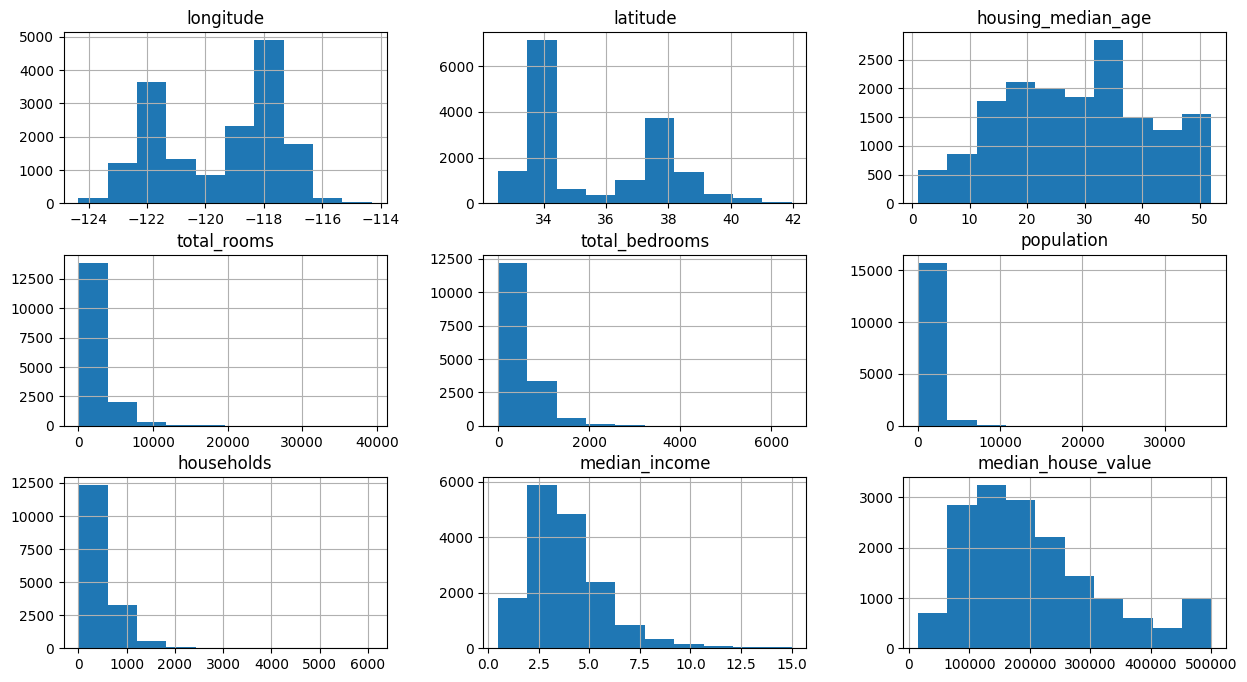

In [13]:
train_data.hist(figsize=(15,8)) #figsize chanage the size of img

In [14]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7238
INLAND        5189
NEAR OCEAN    2111
NEAR BAY      1804
ISLAND           4
Name: count, dtype: int64

In [15]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [16]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8420,-118.34,33.93,37.0,1638.0,407.0,1341.0,369.0,3.0677,167700.0,True,False,False,False,False
511,-122.22,37.82,42.0,2991.0,335.0,1018.0,335.0,13.4990,500001.0,False,False,False,True,False
12225,-116.90,33.65,15.0,652.0,149.0,248.0,97.0,2.1071,93800.0,False,True,False,False,False
5173,-118.27,33.95,40.0,935.0,226.0,818.0,236.0,1.8798,101300.0,True,False,False,False,False
979,-121.87,37.67,10.0,4337.0,800.0,1813.0,743.0,5.5000,247200.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13147,-121.70,38.10,19.0,4896.0,1083.0,2150.0,905.0,3.3398,89700.0,False,True,False,False,False
3216,-119.65,36.33,52.0,1257.0,257.0,624.0,243.0,2.3523,59100.0,False,True,False,False,False
1372,-122.11,38.01,41.0,1345.0,272.0,718.0,283.0,3.3831,129400.0,False,False,False,True,False
11816,-121.06,38.98,14.0,2267.0,355.0,1140.0,369.0,4.7019,212800.0,False,True,False,False,False


In [17]:
train_data.corr() #gives a correlation matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.923647,-0.109479,0.040843,0.064955,0.095918,0.051848,-0.015480,-0.044422,0.319981,-0.053066,0.009401,-0.473780,0.041955
latitude,-0.923647,1.000000,0.011539,-0.033674,-0.063613,-0.105467,-0.068131,-0.080141,-0.146366,-0.447380,0.351028,-0.016600,0.358713,-0.158983
housing_median_age,-0.109479,0.011539,1.000000,-0.359125,-0.320205,-0.293432,-0.302311,-0.118240,0.108866,0.046844,-0.237896,0.014152,0.253664,0.023150
total_rooms,0.040843,-0.033674,-0.359125,1.000000,0.930225,0.857531,0.920513,0.201691,0.136938,-0.002851,0.024676,-0.008610,-0.022698,-0.008417
total_bedrooms,0.064955,-0.063613,-0.320205,0.930225,1.000000,0.876764,0.980224,-0.005172,0.052812,0.017635,-0.007353,-0.005276,-0.018583,0.001696
population,0.095918,-0.105467,-0.293432,0.857531,0.876764,1.000000,0.906031,0.007817,-0.021637,0.072966,-0.019769,-0.010631,-0.060373,-0.023729
households,0.051848,-0.068131,-0.302311,0.920513,0.980224,0.906031,1.000000,0.016497,0.068477,0.040645,-0.038090,-0.009295,-0.010546,0.002956
median_income,-0.015480,-0.080141,-0.118240,0.201691,-0.005172,0.007817,0.016497,1.000000,0.689246,0.172096,-0.239594,-0.010643,0.058709,0.023300
median_house_value,-0.044422,-0.146366,0.108866,0.136938,0.052812,-0.021637,0.068477,0.689246,1.000000,0.262581,-0.487763,0.026150,0.159587,0.137770
<1H OCEAN,0.319981,-0.447380,0.046844,-0.002851,0.017635,0.072966,0.040645,0.172096,0.262581,1.000000,-0.607947,-0.013947,-0.313981,-0.343292


<Axes: >

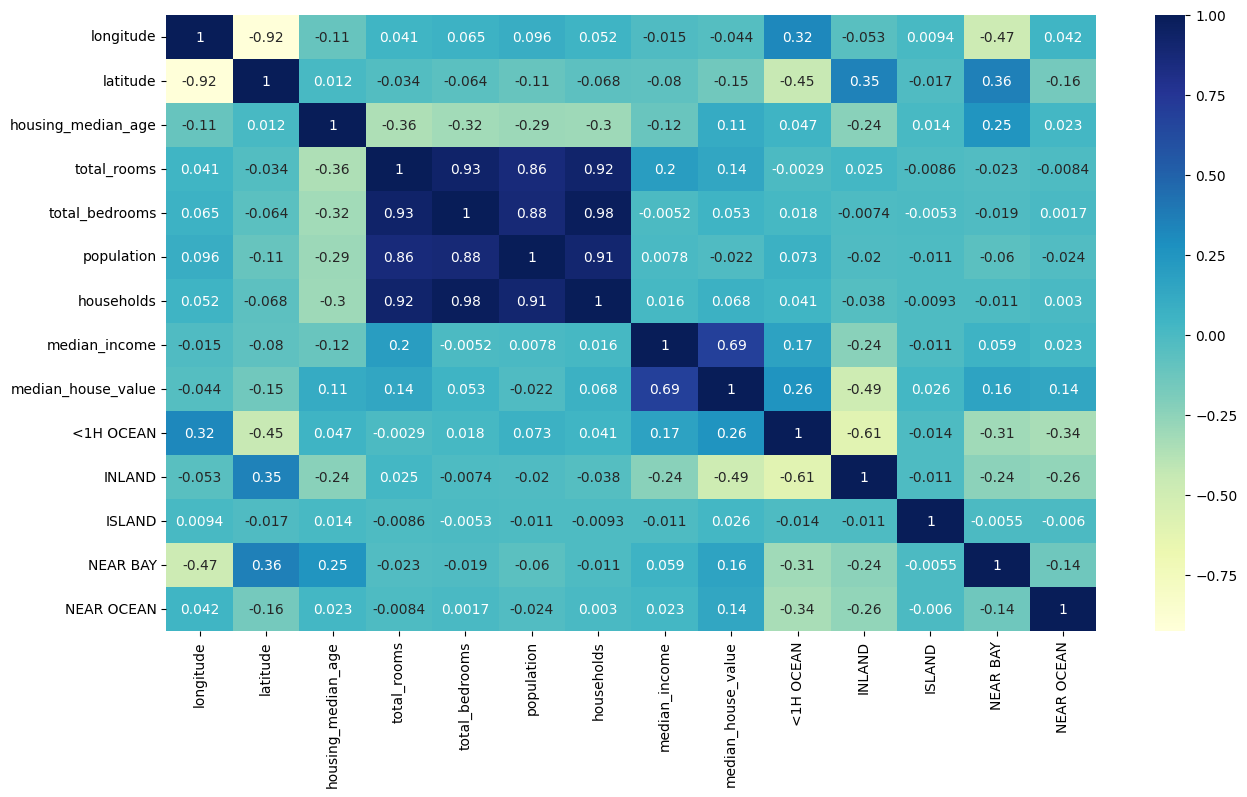

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu") #annotation true

In [19]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

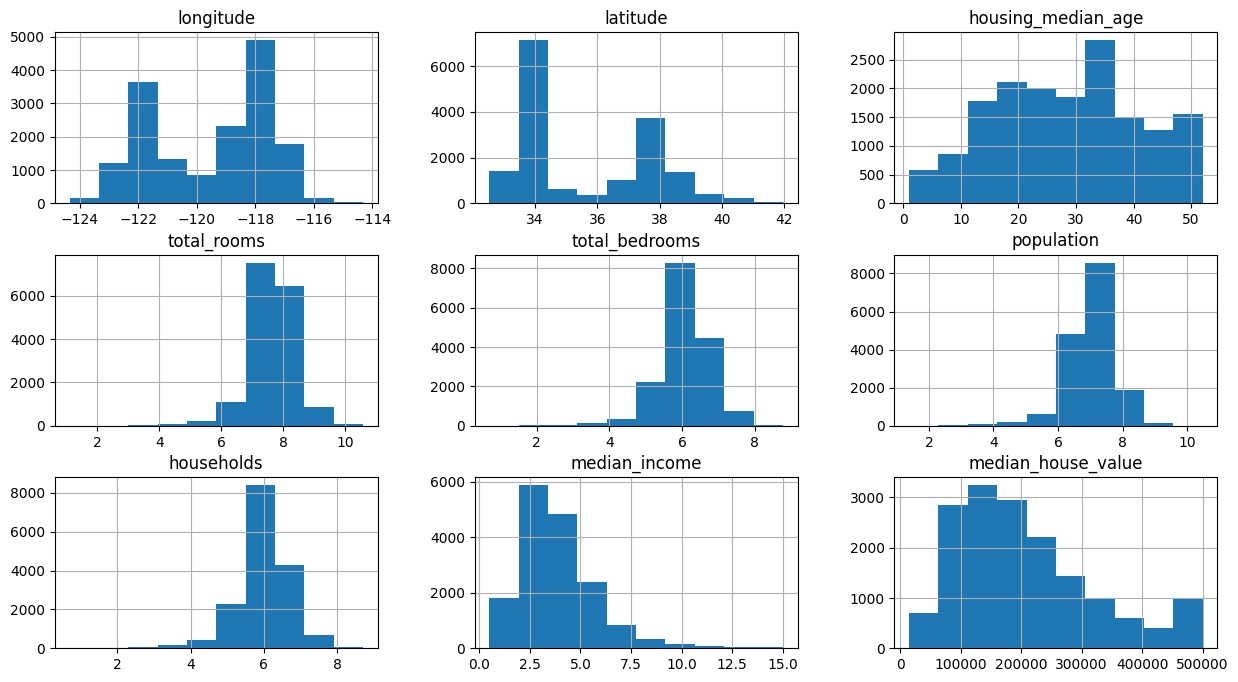

In [20]:
train_data.hist(figsize=(15,8))

<Axes: xlabel='latitude', ylabel='longitude'>

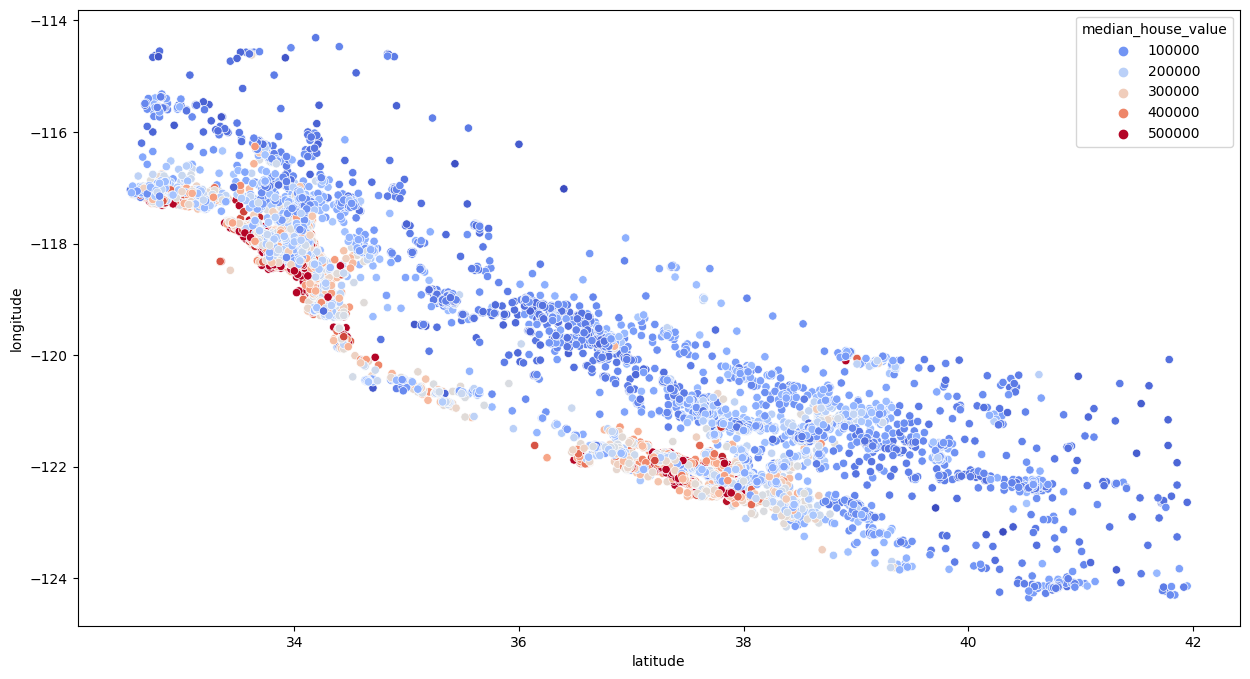

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = "latitude", y ="longitude", data= train_data, hue = "median_house_value", palette="coolwarm")